# 14장. 트리와 랜덤 포레스트

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-python-cookbook-2nd/blob/main/ch14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
# 코랩을 사용하는 경우 다음 명령을 실행하세요.
!pip install pydotplus

In [2]:
import numpy as np
import sklearn
import matplotlib

print('numpy', np.__version__)
print('sklearn', sklearn.__version__)
print('matplotlib', matplotlib.__version__)

numpy 1.26.4
sklearn 1.6.0
matplotlib 3.8.0


## 14.1 결정 트리 분류기 훈련하기

In [3]:
# 라이브러리를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 결정 트리 분류기를 만듭니다.
decisiontree = DecisionTreeClassifier(random_state=0)

# 모델을 훈련합니다.
model = decisiontree.fit(features, target)

In [4]:
# 새로운 샘플을 만듭니다.
observation = [[ 5,  4,  3,  2]]

# 샘플의 클래스를 예측합니다.
model.predict(observation)

array([1])

In [5]:
# 세 개의 클래스에 댜한 예측 확률을 확인합니다.
model.predict_proba(observation)

array([[0., 1., 0.]])

In [6]:
# 엔트로피를 사용해 결정 트리 분류기를 훈련합니다.
decisiontree_entropy = DecisionTreeClassifier(
    criterion='entropy', random_state=0)

# 모델을 훈련합니다.
model_entropy = decisiontree_entropy.fit(features, target)

## 14.2 결정 트리 회귀 훈련하기

In [7]:
# 라이브러리를 임포트합니다.
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# 데이터를 로드합니다.
diabetes = datasets.load_diabetes()
features = diabetes.data
target = diabetes.target

# 결정 트리 회귀 모델을 만듭니다.
decisiontree = DecisionTreeRegressor(random_state=0)

# 모델을 훈련합니다.
model = decisiontree.fit(features, target)

In [8]:
# 새로운 샘플을 만듭니다.
observation = [features[0]]

# 샘플의 타깃을 예측합니다.
model.predict(observation)

array([151.])

In [9]:
# 평균 제곱 오차를 사용한 결정 트리 회귀 모델을 훈련합니다.
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

# 모델을 훈련합니다.
model_mae = decisiontree_mae.fit(features, target)

## 14.3 결정 트리 모델 시각화

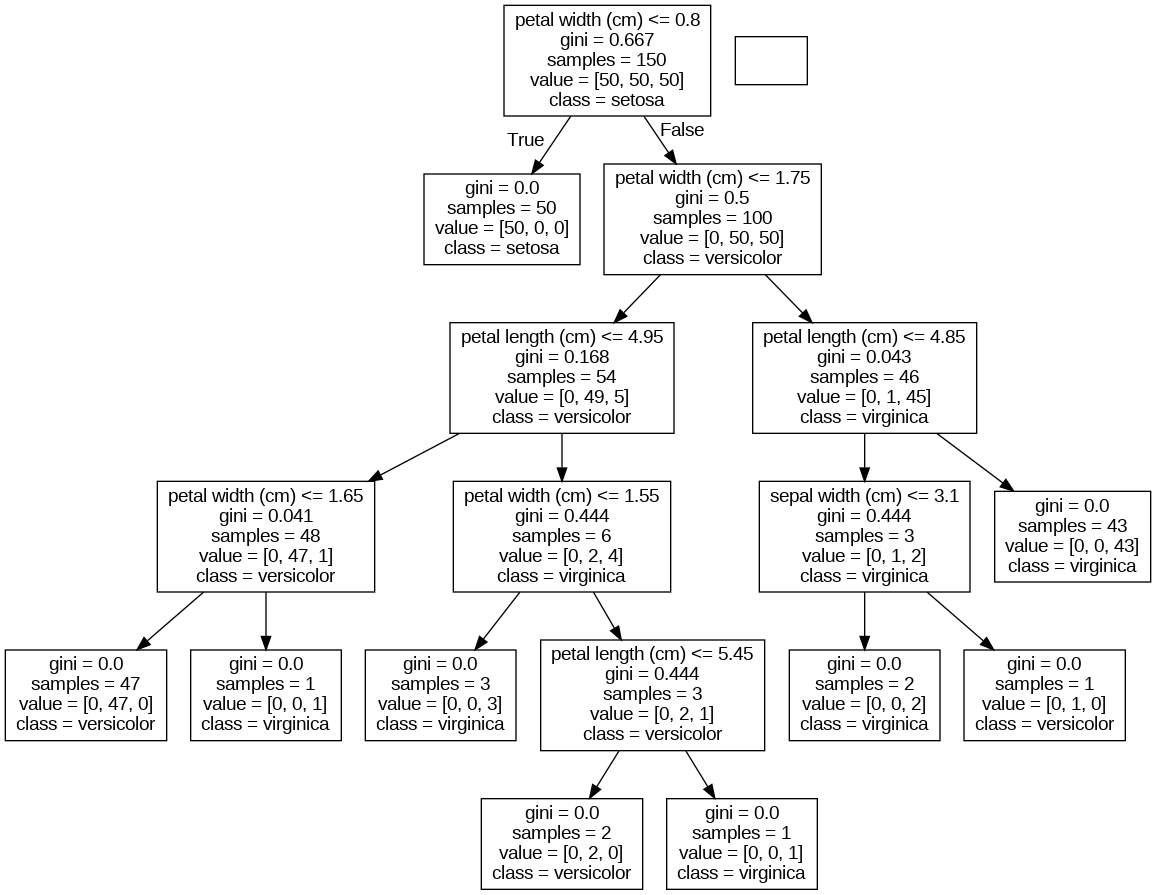

In [10]:
# 라이브러리를 임포트합니다.
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 결정 트리 분류기를 만듭니다.
decisiontree = DecisionTreeClassifier(random_state=0)

# 모델을 훈련합니다.
model = decisiontree.fit(features, target)

# DOT 데이터를 만듭니다.
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# 그래프를 그립니다.
graph = pydotplus.graph_from_dot_data(dot_data)

# 그래프를 출력합니다.
Image(graph.create_png())

In [11]:
# PDF를 만듭니다.
graph.write_pdf("iris.pdf")

True

In [12]:
# PNG 파일을 만듭니다.
graph.write_png("iris.png")

True

## 붙임

In [13]:
import matplotlib.pyplot as plt

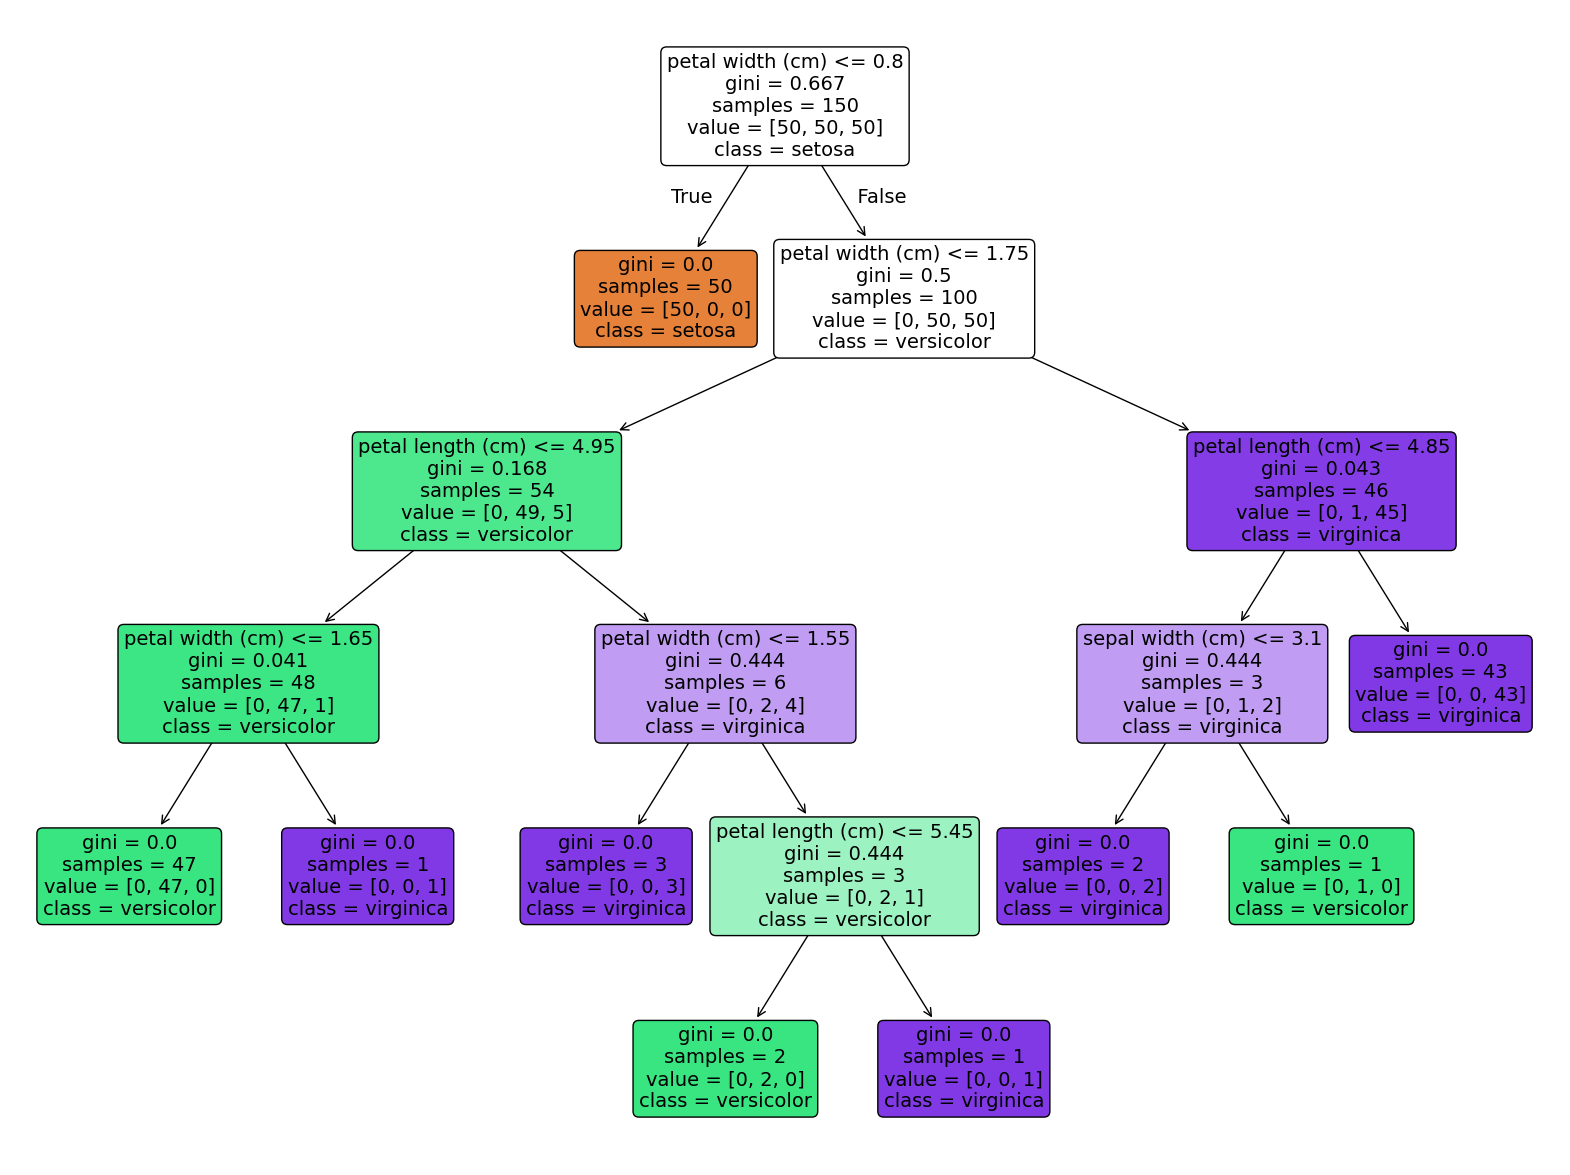

In [14]:
plt.figure(figsize=(20, 15))
tree.plot_tree(model, filled=True,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True, fontsize=14)
plt.show()

## 14.4 랜덤 포레스트 분류기 훈련하기

In [15]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 랜덤 포레스트 분류기 객체를 만듭니다.
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# 모델을 훈련합니다.
model = randomforest.fit(features, target)

In [16]:
# 새로운 샘플을 만듭니다.
observation = [[ 5,  4,  3,  2]]

# 샘플 클래스를 예측합니다.
model.predict(observation)

array([1])

In [17]:
# 엔트로피를 사용하여 랜덤 포레스트 분류기 객체를 만듭니다.
randomforest_entropy = RandomForestClassifier(
    criterion="entropy", random_state=0)

# 모델을 훈련합니다.
model_entropy = randomforest_entropy.fit(features, target)

## 14.5 랜덤 포레스트 회귀 훈련하기

In [18]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

# 데이터를 로드합니다.
diabetes = datasets.load_diabetes()
features = diabetes.data
target = diabetes.target

# 랜덤 포레스트 회귀 객체를 만듭니다.
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# 모델을 훈련합니다.
model = randomforest.fit(features, target)

## 14.6 OOB(out-of-bag) 데이터로 랜덤 포레스트 평가하기

In [19]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 랜덤 포레스트 분류기의 객체를 만듭니다.
randomforest = RandomForestClassifier(
    random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

# 모델을 훈련합니다.
model = randomforest.fit(features, target)

# OOB 오차를 확인합니다.
randomforest.oob_score_

0.9533333333333334

### 붙임

In [20]:
# 라이브러리를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 배깅 분류기의 객체를 만듭니다.
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                            random_state=0, oob_score=True, n_jobs=-1)

# 모델을 훈련합니다.
model = bagging.fit(features, target)

# OOB 오차를 확인합니다.
model.oob_score_

0.9533333333333334

## 14.7 랜덤 포레스트에서 중요한 특성 구분하기

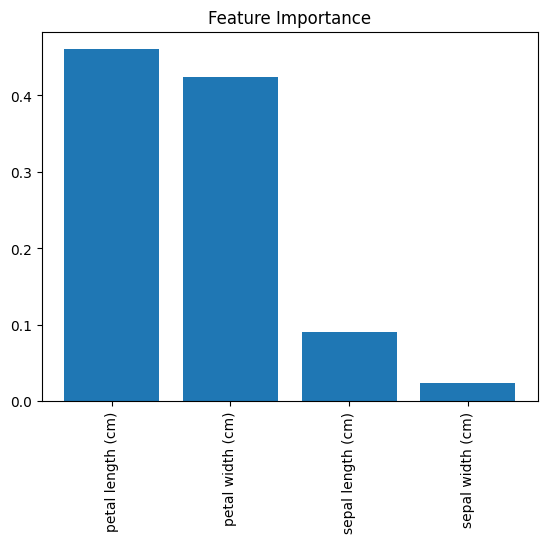

In [21]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 랜덤 포레스트 분류기 객체를 만듭니다.
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# 모델을 훈련합니다.
model = randomforest.fit(features, target)

# 특성 중요도를 계산합니다.
importances = model.feature_importances_

# 특성 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 정렬된 특성 중요도에 따라 특성의 이름을 나열합니다.
names = [iris.feature_names[i] for i in indices]

# 그래프를 만듭니다.
plt.figure()

# 그래프 제목을 지정합니다.
plt.title("Feature Importance")

# 막대 그래프를 추가합니다.
plt.bar(range(features.shape[1]), importances[indices])

# x 축 레이블로 특성 이름을 사용합니다.
plt.xticks(range(features.shape[1]), names, rotation=90)

# 그래프를 출력합니다.
plt.show()

In [22]:
# 특성 중요도를 확인합니다.
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

### 붙임

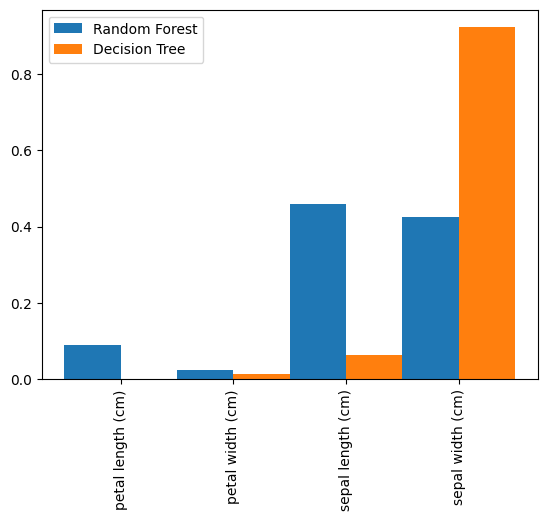

In [23]:
# 결정 트리 분류기를 만듭니다.
decisiontree = DecisionTreeClassifier(random_state=0)

# 모델을 훈련합니다.
model = decisiontree.fit(features, target)

# 랜덤 포레스트와 결정 트리의 특성 중요도를 비교합니다.
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(features.shape[1])-0.25,
                randomforest.feature_importances_, 0.5,
                label='Random Forest')
rects2 = ax.bar(np.arange(features.shape[1])+0.25, model.feature_importances_, 0.5,
                label='Decision Tree')
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.legend()
plt.show()

# 14.8 랜덤 포레스트에서 중요한 특성 선택하기

In [24]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 랜덤 포레스트 분류기를 만듭니다.
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# 특성 중요도가 임계값보다 크거나 같은 특성으로 객체를 만듭니다.
selector = SelectFromModel(randomforest, threshold=0.3)

# selector를 사용하여 새로운 특성 행렬을 만듭니다.
features_important = selector.fit_transform(features, target)

# 가장 중요한 특성을 사용하여 랜덤 포레스트 모델을 훈련합니다.
model = randomforest.fit(features_important, target)

## 14.9 불균형한 클래스 다루기

In [25]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 처음 40개의 샘플을 제거하여 불균형한 데이터를 만듭니다.
features = features[40:,:]
target = target[40:]

# 0인 클래스 이외에는 모두 1인 타깃 벡터를 만듭니다.
target = np.where((target == 0), 0, 1)

# 랜덤 포레스트 분류기 객체를 만듭니다.
randomforest = RandomForestClassifier(
    random_state=0, n_jobs=-1, class_weight="balanced")

# 모델을 훈련합니다.
model = randomforest.fit(features, target)

In [26]:
# 작은 클래스의 가중치를 계산합니다.
110/(2*10)

5.5

In [27]:
# 큰 클래스의 가중치를 계산합니다.
110/(2*100)

0.55

## 14.10 트리 크기 제어하기

In [28]:
# 라이브러리를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 결정 트리 분류기를 만듭니다.
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

# 모델을 훈련합니다.
model = decisiontree.fit(features, target)

## 14.11 부스팅을 사용하여 성능 향상하기

In [29]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 에이다부스트 트리 분류기의 객체를 만듭니다.
adaboost = AdaBoostClassifier(random_state=0)

# 모델을 훈련합니다.
model = adaboost.fit(features, target)

### 붙임

In [30]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import GradientBoostingClassifier

# 그래디언트 부스팅 분류기의 객체를 만듭니다.
gradientboost = GradientBoostingClassifier(random_state=0)

# 모델을 훈련합니다.
model = gradientboost.fit(features, target)

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier

# 히스토그램 기반의 그래디언트 부스팅 분류기의 객체를 만듭니다.
histgradientboost = HistGradientBoostingClassifier(random_state=0)

# 모델을 훈련합니다.
model = histgradientboost.fit(features, target)

## 14.12 XGBoost 모델 훈련하기

In [32]:
# 라이브러리를 임포트합니다.
import xgboost as xgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 데이터셋을 만듭니다.
xgb_train = xgb.DMatrix(features, label=target)

# 파라미터를 정의합니다.
param = {
    'objective': 'multi:softprob',
    'num_class': 3
}

# 모델을 훈련합니다.
gbm = xgb.train(param, xgb_train)

# 예측을 만듭니다.
predictions = argmax(gbm.predict(xgb_train), axis=1)

# 분류 리포트를 출력합니다.
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



## 14.13 LightGBM으로 실시간 성능 향상하기

In [34]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [35]:
# 라이브러리를 임포트합니다.
import lightgbm as lgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 데이터셋을 만듭니다.
lgb_train = lgb.Dataset(features, target)

# 파라미터를 정의합니다.
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'verbose': -1,
}

# 모델을 훈련합니다.
gbm = lgb.train(params, lgb_train)

# 예측을 만듭니다.
predictions = argmax(gbm.predict(features), axis=1)

# 분류 리포트를 출력합니다.
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

